In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [2]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
vgg16 = VGG16(weights = 'imagenet', 
                include_top = False, 
                input_shape = (img_rows, img_cols, 3))

2022-08-23 05:08:22.708826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 05:08:22.825304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 05:08:22.826158: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 05:08:22.828361: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [4]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 64
img_cols = 64 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [5]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model

num_classes = 36

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
validation_data_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 10
val_batchsize = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [8]:
train_generator.class_indices

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [9]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("seatbelt.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 3115
nb_validation_samples = 351
epochs = 50
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)



/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-23 05:08:27.545320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-08-23 05:08:29.894482: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/194 [..............................] - ETA: 25:32 - loss: 4.1762 - accuracy: 0.0000e+00

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


194/194 [==============================] - 148s 725ms/step - loss: 3.3573 - accuracy: 0.1261 - val_loss: 2.4369 - val_accuracy: 0.3095

Epoch 00001: val_loss improved from inf to 2.43693, saving model to seatbelt.h5
Epoch 2/50
194/194 [==============================] - 109s 561ms/step - loss: 2.7856 - accuracy: 0.2274 - val_loss: 1.9503 - val_accuracy: 0.4940

Epoch 00002: val_loss improved from 2.43693 to 1.95030, saving model to seatbelt.h5
Epoch 3/50
194/194 [==============================] - 100s 515ms/step - loss: 2.5700 - accuracy: 0.2817 - val_loss: 1.7435 - val_accuracy: 0.4940

Epoch 00003: val_loss improved from 1.95030 to 1.74352, saving model to seatbelt.h5
Epoch 4/50
194/194 [==============================] - 95s 488ms/step - loss: 2.3211 - accuracy: 0.3550 - val_loss: 1.5275 - val_accuracy: 0.5536

Epoch 00004: val_loss improved from 1.74352 to 1.52752, saving model to seatbelt.h5
Epoch 5/50
194/194 [==============================] - 95s 493ms/step - loss: 2.2116 - accura

In [10]:
# CLASSIFICATION REPORT AND THE CONFUSION MATRIX FOR THE vgg16
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
class_labels = {0:'apple',1:'banana', 2:'beetroot',3:'bell pepper',4:'cabbage',5:'capsicum',6:'carrot',7:'cauliflower',8:'chilli pepper',9:'corn',10:'cucumber',11:'eggplant',12:'garlic',13:'giner',14:'grapes',15:'jalepeno',16:'kiwi',17:'lemon',18:'lettuce',19:'mango',20:'onion',21:'orange',22:'paprika',23:'pear',24:'peas',25:'pineapple',26:'pomegranate',27:'potato',28:'raddish',29:'soy beans',30:'spinach',31:'sweetcorn',32:'sweetpotato',33:'tomato',34:'turnip',35:'watermelon'}
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[6 0 0 ... 1 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 4 ... 0 1 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 8 0]
 [0 0 0 ... 0 0 9]]
Classification Report
               precision    recall  f1-score   support

        apple       0.67      0.60      0.63        10
       banana       1.00      0.89      0.94         9
     beetroot       0.67      0.40      0.50        10
  bell pepper       0.56      0.56      0.56         9
      cabbage       0.77      1.00      0.87        10
     capsicum       0.50      0.80      0.62        10
       carrot       0.88      0.78      0.82         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.67      0.67      0.67         9
         corn       0.77      1.00      0.87        10
     cucumber       0.90      0.90      0.90        10
     eggplant       1.00      0.60      0.75        10
       garlic       0.83      1.00      0.91        10
        giner       1.00      0.70      0.82        10
       grapes  

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


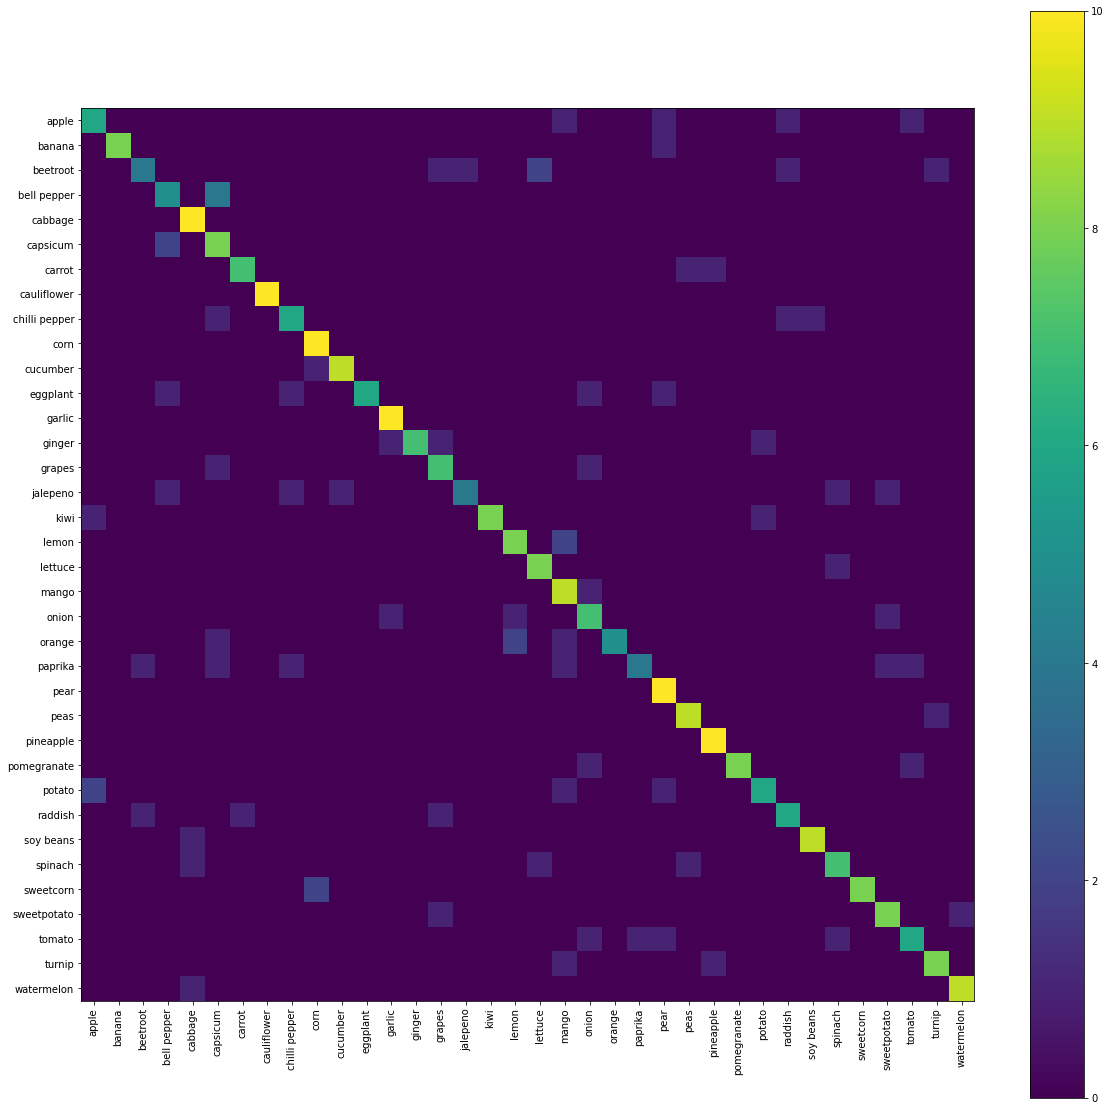

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 224,224,3
model = load_model('seatbelt.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 3115
nb_validation_samples = 351

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

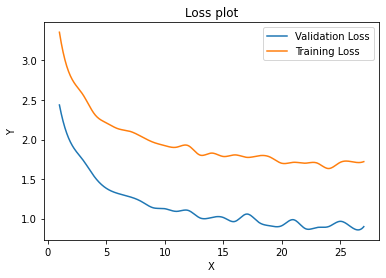

In [12]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['loss']
y1=history_dict['val_loss']

model = make_interp_spline(epochs, y)
model1 = make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)

plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='Validation Loss')
plt.plot(xs, ys,label='Training Loss')
plt.title("Loss plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

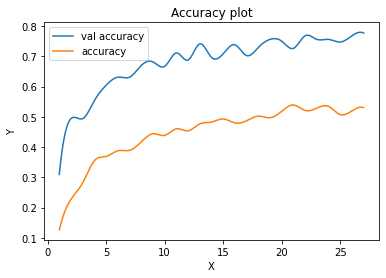

In [13]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['accuracy']
y1=history_dict['val_accuracy']

model=make_interp_spline(epochs, y)
model1=make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)
plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='val accuracy')
plt.plot(xs, ys,label='accuracy')
plt.title("Accuracy plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [14]:
history.history

{'loss': [3.3572983741760254,
  2.7855567932128906,
  2.5699784755706787,
  2.321063280105591,
  2.211578130722046,
  2.1367104053497314,
  2.1046881675720215,
  2.0378925800323486,
  1.966255784034729,
  1.9227356910705566,
  1.9026362895965576,
  1.9230610132217407,
  1.803759217262268,
  1.828411340713501,
  1.785477638244629,
  1.805593490600586,
  1.7745176553726196,
  1.7943142652511597,
  1.7778457403182983,
  1.6994266510009766,
  1.711800456047058,
  1.70073664188385,
  1.7035198211669922,
  1.6330831050872803,
  1.712235927581787,
  1.7188364267349243,
  1.720513939857483],
 'accuracy': [0.12609818577766418,
  0.22739018499851227,
  0.2816537320613861,
  0.35503876209259033,
  0.36899223923683167,
  0.38762885332107544,
  0.3891472816467285,
  0.4170103073120117,
  0.4438144266605377,
  0.43865978717803955,
  0.4603092670440674,
  0.4537467658519745,
  0.4764857888221741,
  0.4824742376804352,
  0.49302324652671814,
  0.47958657145500183,
  0.48711341619491577,
  0.5020618438

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


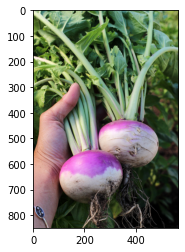

In [15]:
#Testing the models
import tensorflow
import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
 
# creating a object
model = keras.models.load_model('seatbelt.h5')

path = '/kaggle/input/fruit-and-vegetable-image-recognition/validation/turnip/Image_3.jpg'
#path = '/content/drive/MyDrive/new_set_belt/new_seat_belt_REFINED_RAW_DATASET/test/positive/opencv_frame_28 (4).png'
test_image = load_img(path,target_size = (64,64,3))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
# reading the image
testImage = img.imread(path)
class_labels = {0:'apple',
                 1:'banana',
                 2:'beetroot',
                 3:'bell pepper',
                 4:'cabbage',
                 5:'capsicum',
                 6:'carrot',
                 7:'cauliflower',
                 8:'chilli pepper',
                 9:'corn',
                 10:'cucumber',
                 11:'eggplant',
                 12:'garlic',
                 13:'giner',
                 14:'grapes',
                 15:'jalepeno',
                 16:'kiwi',
                 17:'lemon',
                 18:'lettuce',
                 19:'mango',
                 20:'onion',
                 21:'orange',
                 22:'paprika',
                 23:'pear',
                 24:'peas',
                 25:'pineapple',
                 26:'pomegranate',
                 27:'potato',
                 28:'raddish',
                 29:'soy beans',
                 30:'spinach',
                 31:'sweetcorn',
                 32:'sweetpotato',
                 33:'tomato',
                 34:'turnip',
                 35:'watermelon'}

# displaying the modified image
plt.imshow(testImage)